**We are going to generate a new images on base of the current image, to create a better dataset**

In case of this course project, we are keeping in mind following intruction to make images:

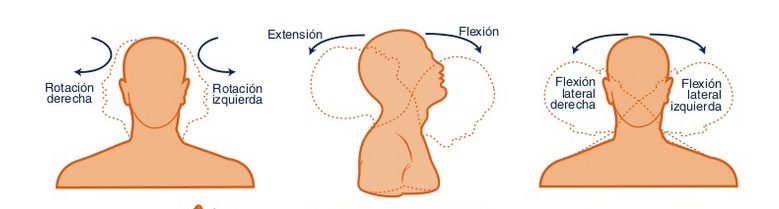

In [1]:
import os
import cv2
import numpy as np 

from natsort import natsorted
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2022-03-21 13:28:03.552486: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-21 13:28:03.552520: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


**Loading images for data-augmentation**

In [2]:
# Path in where is all images

path = "/home/jaqu/Desktop/Personal-Projects/Artificial-Intelligence/Traditional-Computer-Vision/dataset"

In [3]:
# Read all classes given by a name of the folder with the images

class_names = os.listdir(path)

print(f'Classes of our dataset are: {class_names}')

Classes of our dataset are: ['jhon', 'gilber']


**Dimension of current images**

Dimension of current image 1 (1445, 1013, 3)
Dimension of current image 2 (807, 525, 3)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f3b70ec4640>)

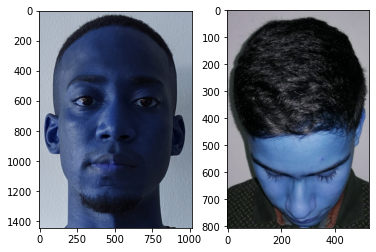

In [4]:
# Create a variable that contain path of a folder of any class

path_one = "/home/jaqu/Desktop/Personal-Projects/Artificial-Intelligence/Traditional-Computer-Vision/dataset/jhon/"
path_second = "/home/jaqu/Desktop/Personal-Projects/Artificial-Intelligence/Traditional-Computer-Vision/dataset/gilber/"

img1 = cv2.imread(os.path.join(path_one, '01.jpg'))
img2 = cv2.imread(os.path.join(path_second, '11.jpg'))
import matplotlib.pyplot as plt

print(f'Dimension of current image 1 {img1.shape}')
print(f'Dimension of current image 2 {img2.shape}')
plt.subplot(1,2,1), plt.imshow(img1)
plt.subplot(1,2,2), plt.imshow(img2)

**Let's store all images into an array**

In [5]:
image_list=[]
image_classes=[]

In [6]:
def listImage(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [7]:
# This code is for get the images for each folder

for names in class_names:
    directorio = os.path.join(path,names)
    class_path = listImage(directorio)
    image_list += class_path
    

In [8]:
# Look that image_list is the variable that contain all images with it respective path

image_list[0]

'/home/jaqu/Desktop/Personal-Projects/Artificial-Intelligence/Traditional-Computer-Vision/dataset/jhon/03.jpg'

In [9]:
# In this case we are working with 22 images, 11 images per class

print(f'The array has: {len(image_list)} images')

The array has: 22 images


**Let's make a resize of all images**

In [10]:
images_resize = []

def resizeImage(images):
  for i in range(len(images)):
    img = cv2.imread(images[i])
    resize = cv2.resize(img, (256,256))
    images_resize.append(resize)
  
  img_resize = images_resize[:len(images)]
  return img_resize

resize = resizeImage(image_list)

Dimension of the resize: (256, 256, 3)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f3b6eaacf10>)

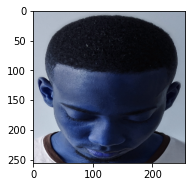

In [11]:
print(f'Dimension of the resize: {resize[0].shape}')
plt.subplot(1,2,1), plt.imshow(resize[0])
plt.subplot(1,2,1), plt.imshow(resize[1])

**Creating target for models**

In [12]:
class_0 = [0]*(len(resize)//2)
class_1 = [1]*(len(resize)//2)
y_label = class_0 + class_1

**Function to make data-augmentation**

In [13]:
# Función para modificar las imagenes

def rot_tras_ilum(list_img,angle_rotation,pix_traslatio_min,pix_traslatio_max,ilumina_rango_min,ilumunation_rango_max):
  img_array = np.array(list_img)
  
  #random_image
  list_img_random=[]
  list_label_random=[]
  datagen = ImageDataGenerator()
  imgs_random=datagen.flow(img_array,y_label,batch_size=1)
  for i in range(len(list_img)):
    batch= imgs_random.next()
    new_img = batch[0].astype('uint8')
    list_img_random.append(new_img[0])
    list_label_random.append(batch[1])

  
  #rotation
  list_img_rotation=[]
  list_label_rotation=[]
  datagen = ImageDataGenerator(rotation_range=angle_rotation, fill_mode='constant')
  imgs_rotarion=datagen.flow(img_array,y_label,batch_size=1)
  for i in range(len(list_img)):
    batch= imgs_rotarion.next()
    new_img = batch[0].astype('uint8')
    list_img_rotation.append(new_img[0])
    list_label_rotation.append(batch[1])
  

  #traslation
  list_img_traslation=[]
  list_label_traslation=[]
  datagen = ImageDataGenerator(width_shift_range=[pix_traslatio_min, pix_traslatio_max], fill_mode='constant')
  imgs_traslation=datagen.flow(img_array,y_label,batch_size=1)
  for i in range(len(list_img)):
    batch= imgs_traslation.next()
    new_img = batch[0].astype('uint8')
    list_img_traslation.append(new_img[0])
    list_label_traslation.append(batch[1])


  #ilumination
  list_img_ilumination=[]
  list_label_ilumination=[]
  datagen = ImageDataGenerator(brightness_range=[0.1,1.5], fill_mode='constant')
  imgs_ilumination=datagen.flow(img_array,y_label,batch_size=1)
  for i in range(len(list_img)):
    batch= imgs_ilumination.next()
    new_img = batch[0].astype('uint8')
    list_img_ilumination.append(new_img[0])
    list_label_ilumination.append(batch[1])


  #flip
  list_img_flip=[]
  list_label_flip=[]
  datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
  imgs_flip=datagen.flow(img_array,y_label,batch_size=1)
  for i in range(len(list_img)):
    batch= imgs_flip.next()
    new_img = batch[0].astype('uint8')
    list_img_flip.append(new_img[0])
    list_label_flip.append(batch[1])
  
  list_img_t=np.array(list_img_random+list_img_rotation+list_img_traslation+list_img_ilumination+list_img_flip)
  list_label_t=np.array(list_label_random+list_label_rotation+list_label_traslation+list_label_ilumination+list_label_flip)

  #random finaly
  list_img_finaly=[]
  list_label_finaly=[]
  datagen = ImageDataGenerator()
  imgs_finaly=datagen.flow(list_img_t,list_label_t,batch_size=1)
  for i in range(len(list_label_t)):
    batch= imgs_finaly.next()
    new_img = batch[0].astype('uint8')
    list_img_finaly.append(new_img[0])
    list_label_finaly.append(batch[1])
  list_img_finaly=np.array(list_img_finaly)
  list_label_finaly=np.array(list_label_finaly)
  


  return(list_img_finaly , list_label_finaly)

**Creating dataset**

In [14]:
#Concatenación de imagenes para crear Dataset

dataset, target = rot_tras_ilum(resize,15,-100,100,4,6)

print(f'Dataset has {len(dataset)} images with {len(target)} labels')

Dataset has 110 images with 110 labels


**Partition of data**

In [96]:
# Using train-test-split from scikit-learn

x_train,x_test,y_train,y_test = train_test_split(dataset, target, train_size=0.8, random_state = 0)

print(f'We have {len(x_train)} images for training & {len(x_test)} for testing')
print(f'with a dimension of {x_train[0].shape} per image')

We have 88 images for training & 22 for testing
with a dimension of (256, 256, 3) per image


In [97]:
y_test

array([[[1]],

       [[1]],

       [[1]],

       [[1]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[1]],

       [[0]],

       [[0]],

       [[0]],

       [[0]],

       [[1]],

       [[1]],

       [[0]],

       [[0]],

       [[1]]])

**PREPROCESSING IMAGES**

**Convert to gray scale**

In [98]:
# Define a function to convert all images to gray scale

def convert_gray(images):
  
  images_gray = []
  
  for i in natsorted(range(len(images))):
    img_gray = cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)
    images_gray.append(img_gray)
  
  return images_gray

x_train_gray = convert_gray(x_train)
x_test_gray = convert_gray(x_test)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f3b66b36be0>)

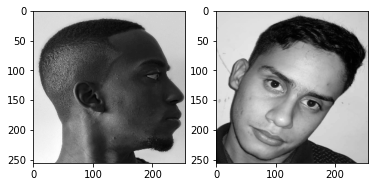

In [99]:
plt.subplot(1,2,1),plt.imshow(x_train_gray[2], cmap='gray')
plt.subplot(1,2,2),plt.imshow(x_train_gray[30], cmap='gray')

**Delete noise**

In [100]:
# Function to delete noise in all images

def delete_noise(images):
  blur = []

  for i in range(len(images)):
      blur_images = cv2.blur((images[i]), (3,3))
      blur.append(blur_images)

  return blur

x_train_wn = delete_noise(x_train_gray)
x_test_wn = delete_noise(x_test_gray)


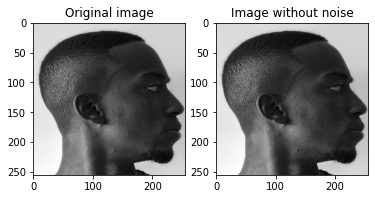

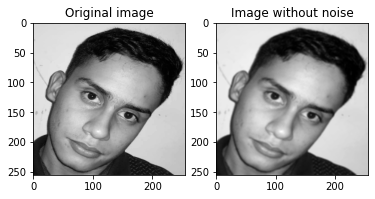

In [106]:
plt.subplot(1,2,1),plt.imshow(x_train_gray[2], cmap='gray'), plt.title("Original image")
plt.subplot(1,2,2),plt.imshow(x_train_gray[2], cmap='gray'), plt.title("Image without noise")
plt.show()

plt.subplot(1,2,1), plt.imshow(x_train_gray[30], cmap='gray'), plt.title("Original image")
plt.subplot(1,2,2), plt.imshow(x_train_wn[30], cmap='gray'), plt.title("Image without noise")
plt.show()

**Border extraction**

In [107]:
# Define function to extract borders of the images

def borders(images):

  sobel_x = []
  sobel_y = []
  
  for i in range(len(images)):
      sobelx = cv2.Sobel(images[i], cv2.CV_64F, 1 , 0 , ksize = 3)
      sobely = cv2.Sobel(images[i], cv2.CV_64F, 0 , 1 , ksize = 3)
      sobel_x.append(sobelx)
      sobel_y.append(sobely)
    
  #sobx = sobel_x[:len(images)]
  #soby = sobel_y[:len(images)] 

  return sobel_x, sobel_y

x_train_sobelx, x_train_sobely = borders(x_train_gray)

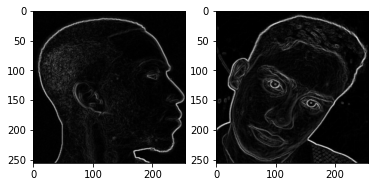

In [109]:
magnitud_sobel_1 = np.abs(x_train_sobelx[2]) + np.abs(x_train_sobely[2])
magnitud_sobel_2 = np.abs(x_train_sobelx[30]) + np.abs(x_train_sobely[30]) 

plt.subplot(1,2,1),plt.imshow(magnitud_sobel_1, cmap='gray')
plt.subplot(1,2,2),plt.imshow(magnitud_sobel_2, cmap='gray')
plt.show()


**Normalization of images**

In [110]:
# Define function to normalize all images

def normImages(images):

  list_normalization = []

  for i in range(len(images)):
    img_norm=cv2.normalize(images[i],None,0,255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U)
    list_normalization.append(img_norm)
  
  list_normalization=np.array(list_normalization)
  
  return list_normalization 

x_train_norm = normImages(x_train_gray)
x_test_norm = normImages(x_test_gray)
print(len(x_train_norm))

88


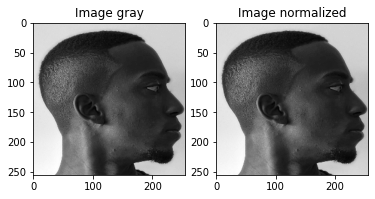

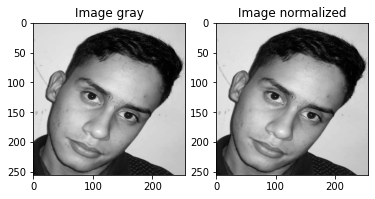

In [112]:
plt.subplot(1,2,1),plt.imshow(x_train_gray[2], cmap='gray'), plt.title('Image gray')
plt.subplot(1,2,2),plt.imshow(x_train_norm[2], cmap='gray'), plt.title('Image normalized')
plt.show()

plt.subplot(1,2,1),plt.imshow(x_train_gray[30], cmap='gray'), plt.title('Image gray')
plt.subplot(1,2,2),plt.imshow(x_train_norm[30], cmap='gray'), plt.title('Image normalized')
plt.show()

**NOTE:**

x_train_norm & x_test_norm are going to be our inputs for detector/descriptor methods.